Reference : https://www.kaggle.com/code/apapiu/regularized-linear-models/notebook

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib

import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats.stats import pearsonr

%config InlineBackend.figure_format = 'png'
%matplotlib inline

Preparing train and test dataset

In [ ]:
train = pd.read_csv("https://storage.googleapis.com/kagglesdsdata/competitions/5407/868283/train.csv?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1667817386&Signature=TClDQx2LjyFPrBriWq4IWuESG%2FiwleDsfxxOy%2BYboeuA3U0%2FFlg19NoUkv2G08pDujQsQLCwUABEsUHbh%2B9FMJ%2F1uvMQlwIUWiF6zzqR7jH9gV0eaIrW4nfAQ1X%2Bl5xcPBV4v20%2FdYPIYS6zvh59PhxtKBFX04VKWb%2BkEG0%2F82iQhGquz5UmPCBz9eJo9C8tlHkgZOmPJcvdQFvYLWigLqckd8ckbot4IHBpogASeBBlyeQHyzf0plyoZ%2BEp9u4XFJ9IXbtjbGdigFYP7vZI3pdq3HFpfL%2FTZx%2BHr1wzqcXClEmPhRZo568JlQia3noQYCFo6GGlj5tQI6%2BQsCxGuQ%3D%3D&response-content-disposition=attachment%3B+filename%3Dtrain.csv")
test = pd.read_csv("https://storage.googleapis.com/kagglesdsdata/competitions/5407/868283/test.csv?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1667817380&Signature=d%2BPRT49TKYqT1O0cSJSGbcbaRl%2FDGgHZFcfQQZ7%2BwVFUbgOkEP30rFcDzXMf8qXLqkqtSlrWqo3Zaa4gvAt%2Bd43eqtEQSJgZkjaxaWnFRJ9Oc8n1ouUogM6eg%2FVURW2v4NcT4pPB8%2F5cat5ASgz3sAQO8lr8blj0nPNK04mK2wKgBQGNr%2FIgTWq8N9abJp2S3%2FkFjpcgDeOgNMUgWhKpJBEchHMgGzXJx3NU%2BhTaM%2BFL0pFNBgaB78dbU2BqaTEpPg1lEkRH18rptszjfiCB04ZYl80MutNJ3mLKLu73pf0pyuHPWucLIfQys%2Bpph1mmI2OmS07Mr5jRAr9dy5TLSQ%3D%3D&response-content-disposition=attachment%3B+filename%3Dtest.csv")
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
# Merge MSSubClass dari train dan test 
all_data = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'],
                      test.loc[:,'MSSubClass':'SaleCondition']))
all_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


Data Preprocessing

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f77a2fe5090>,
      dtype=object)

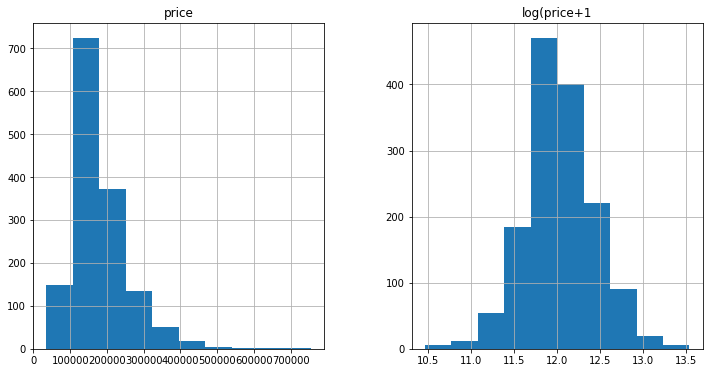

In [ ]:
# transform skewed numeric features with log(feature + 1)
matplotlib.rcParams['figure.figsize'] = (12.0,6.0)
prices = pd.DataFrame({"price":train["SalePrice"],"log(price+1":np.log1p(train["SalePrice"])})
# print histogram
prices.hist()

In [ ]:
#log transform the target:
train["SalePrice"] = np.log1p(train["SalePrice"])

#log transform skewed numeric features:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# hapus nan
skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
# filter data yg condong(skew = lengkung) lebih dari 0.75
skewed_feats = skewed_feats[skewed_feats > 0.75]
# get index
skewed_feats = skewed_feats.index

# replace all data pada index skewed_feats menjadi lebih lengkung
all_data[skewed_feats] = np.log1p(all_data[skewed_feats])

In [ ]:
# Convert categorical variable into dummy/indicator variables
all_data = pd.get_dummies(all_data)

In [ ]:
#filling NA's with the mean of the column:
all_data = all_data.fillna(all_data.mean())

In [ ]:
#creating target matrices for sklearn:
X_train = all_data[:train.shape[0]]
X_test = all_data[train.shape[0]:]
y = train.SalePrice

Creating Models
- Using L_1(Lasso) and L_2(Ridge)
- Create function that return cross-validation rmse error for evaluating and pick the best

In [ ]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score

# Calculate Root Mean Square Error (RMSE)
def rmse_cv(model):
  rmse=np.sqrt(-cross_val_score(model,X_train, y, scoring="neg_mean_squared_error",cv=5))
  return rmse

In [ ]:
model_ridge = Ridge()

The main tuning parameter for the Ridge model is alpha - a regularization parameter that measures how flexible our model is. The higher the regularization the less prone our model will be to overfit. However it will also lose flexibility and might not capture all of the signal in the data.

In [ ]:
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() for alpha in alphas]

Text(0, 0.5, 'Root Mean Square Error')

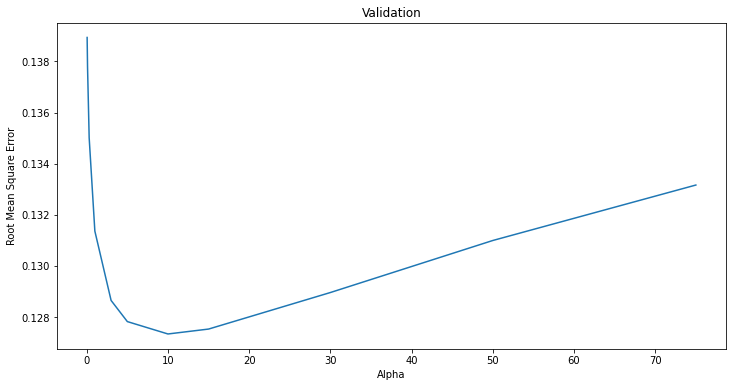

In [ ]:
cv_ridge = pd.Series(cv_ridge,index=alphas)
cv_ridge.plot(title="Validation")
plt.xlabel("Alpha")
plt.ylabel("Root Mean Square Error")

Note the U-ish shaped curve above. When alpha is too large the regularization is too strong and the model cannot capture all the complexities in the data. If however we let the model be too flexible (alpha small) the model begins to overfit. A value of alpha = 10 is about right based on the plot above.

In [ ]:
cv_ridge.min()

0.12733734668670754

So for the Ridge regression we get a rmsle of about 0.127

Let' try out the Lasso model. We will do a slightly different approach here and use the built in Lasso CV to figure out the best alpha for us. For some reason the alphas in Lasso CV are really the inverse or the alphas in Ridge.

In [ ]:
model_lasso = LassoCV(alphas = [1,0.1,0.001,0.0005]).fit(X_train, y)

In [ ]:
rmse_cv(model_lasso).mean()

0.12256735885048131

Nice! The lasso performs even better so we'll just use this one to predict on the test set. Another neat thing about the Lasso is that it does feature selection for you - setting coefficients of features it deems unimportant to zero. Let's take a look at the coefficients:

In [ ]:
coef = pd.Series(model_lasso.coef_,index=X_train.columns)

In [ ]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 110 variables and eliminated the other 178 variables


Good job Lasso. One thing to note here however is that the features selected are not necessarily the "correct" ones - especially since there are a lot of collinear features in this dataset. One idea to try here is run Lasso a few times on boostrapped samples and see how stable the feature selection is.

We can also take a look directly at what the most important coefficients are:

In [ ]:
# Important Coefficient
imp_coef = pd.concat([coef.sort_values().head(10),coef.sort_values().tail(10)])

Text(0.5, 1.0, 'Coefficients in Lasso Model')

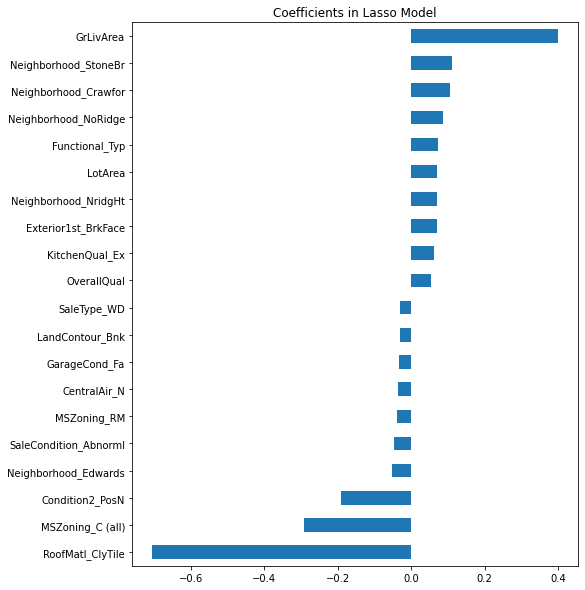

In [ ]:
matplotlib.rcParams['figure.figsize'] = (8.0,10.0)
imp_coef.plot(kind="barh")
plt.title("Coefficients in Lasso Model")

The most important positive feature is `GrLivArea` - the above ground area by area square feet. This definitely sense. Then a few other location and quality features contributed positively. Some of the negative features make less sense and would be worth looking into more - it seems like they might come from unbalanced categorical variables.

Also note that unlike the feature importance you'd get from a random forest these are actual coefficients in your model - so you can say precisely why the predicted price is what it is. The only issue here is that we log_transformed both the target and the numeric features so the actual magnitudes are a bit hard to interpret.

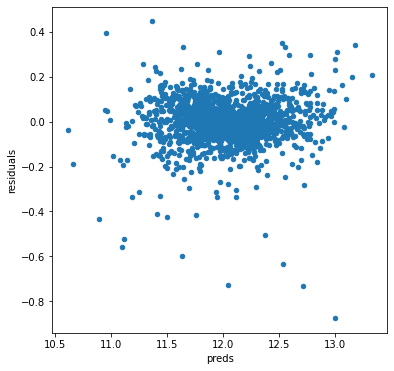

In [ ]:
#let's look at the residuals as well:
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)

preds = pd.DataFrame({"preds":model_lasso.predict(X_train), "true":y})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")

The residual plot looks pretty good.To wrap it up let's predict on the test set and submit on the leaderboard:

Adding an xgboost model:

Let's add an xgboost model to our linear model to see if we can improve our score:

In [ ]:
import xgboost as xgb

In [ ]:
dtrain = xgb.DMatrix(X_train,label=y)
dtest = xgb.DMatrix(X_test)

params = {"max_depth":2,"eta":0.1}
model = xgb.cv(params,dtrain,num_boost_round=500,early_stopping_rounds=100)


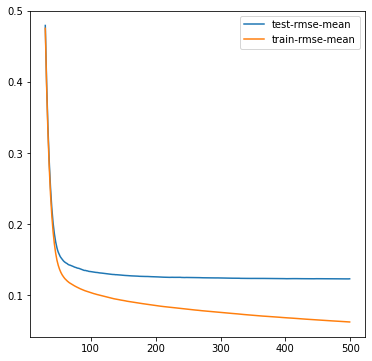

In [ ]:
model.loc[30:,["test-rmse-mean","train-rmse-mean"]].plot()

In [ ]:
#the params were tuned using xgb.cv
model_xgb = xgb.XGBRegressor(n_estimators=360,max_depth=2,learning_rate=0.1) 
model_xgb.fit(X_train,y)

[12:34:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(max_depth=2, n_estimators=360)

In [ ]:
xgb_preds = np.expm1(model_xgb.predict(X_test))
lasso_preds = np.expm1(model_lasso.predict(X_test))

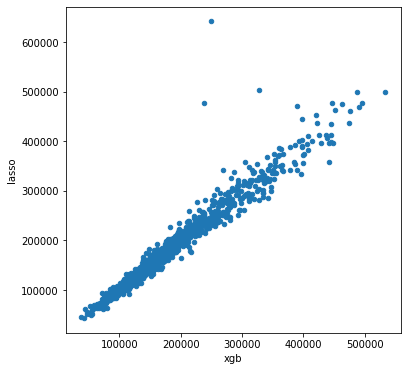

In [ ]:
predictions = pd.DataFrame({"xgb":xgb_preds, "lasso":lasso_preds})
predictions.plot(x = "xgb", y = "lasso", kind = "scatter")

Many times it makes sense to take a weighted average of uncorrelated results - this usually imporoves the score although in this case it doesn't help that much.

In [ ]:
preds = 0.7*lasso_preds + 0.3*xgb_preds

In [ ]:
solution = pd.DataFrame({"id":test.Id, "SalePrice":preds})
solution.to_csv("ridge_sol.csv", index = False)

Try with keras

In [ ]:
from keras.layers import Dense
from keras.models import Sequential
from keras.regularizers import l1
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

Using TensorFlow backend.

In [ ]:
X_train = StandardScaler().fit_transform(X_train)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y, random_state = 3)

In [ ]:
X_train.shape

In [ ]:
model = Sequential()

model.add(Dense(1, input_dim = X_train.shape[1], bias_regularizer=l1(0.001)))
model.compile(loss = "mse", optimizer = "adam")

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 289       
                                                                 
Total params: 289
Trainable params: 289
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train, y_train, validation_data = (X_test, y_test))

35/35 [==============================] - 1s 5ms/step - loss: 145.6529 - val_loss: 150.5813


12/12 [==============================] - 0s 2ms/step


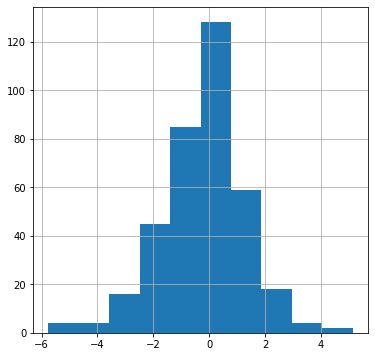

In [ ]:
pd.Series(model.predict(X_test)[:,0]).hist()